<h1><b>1. Data Collection and Loading</b></h1>

In [3]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import json
import sqlite3

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns

<h3><b>Suppress Warnings</b></h3>

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [236]:
# Load and connect to the sqlite database dump 'outpatients_charges.db'
conn = sqlite3.connect(r'C:\Users\Richard Muchoki\Documents\Savannah\Savannah_Technical_Interview\outpatient_charges.db')

# Load the inpatient json files into the dataframe "inpatient_data"
inpatient_data = {}
for year in range(2011, 2014):
    with open(f"C:/Users/Richard Muchoki/Documents/Savannah/Savannah_Technical_Interview/inpatient_{year}.json") as f:
        inpatient_data[year] = pd.DataFrame(json.load(f))

# Load the csv hospital general info file
hospital_info = pd.read_csv(r"C:\Users\Richard Muchoki\Documents\Savannah\Savannah_Technical_Interview\hospital_general_info.csv")

<h1><b>2. Data Understanding</b></h1>

<h3><b>2.1: Hospital General Info File</b></h3>

In [10]:
# Let's display the first 5 rows
hospital_info.head()

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,readmission_measures_footnote,patient_experience_measures_count,facility_patient_experience_measures_count,patient_experience_measures_footnote,timely_and_effective_care_measures_count,facility_timely_and_effective_care_measures_count,timely_and_effective_care_measures_footnote
0,010018,CALLAHAN EYE HOSPITAL,"1720 UNIVERSITY BLVD, SUITE 500",BIRMINGHAM,AL,35233,Jefferson,(205) 325-8100,Acute Care Hospitals,Voluntary non-profit - Private,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN
1,010051,GREENE COUNTY HOSPITAL,509 WILSON AVENUE,EUTAW,AL,35462,Greene,(205) 372-3388,Acute Care Hospitals,Government - Local,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN
2,010102,J PAUL JONES HOSPITAL,317 MCWILLIAMS AVENUE,CAMDEN,AL,36726,Wilcox,(334) 682-4131,Acute Care Hospitals,Voluntary non-profit - Other,...,0,1,0,NaN,8,Not Available,5.0,14,3,NaN
3,030074,SELLS HOSPITAL,"HIGHWAY 86, AT TOPAWA ROAD",SELLS,AZ,85634,Pima,(520) 362-7003,Acute Care Hospitals,Tribal,...,0,1,0,NaN,8,Not Available,5.0,14,Not Available,5.0
4,030136,DIGNITY HEALTH - ARIZONA GENERAL HOSPITAL,7171 SOUTH 51ST AVENUE,LAVEEN,AZ,85339,Maricopa,(623) 584-5100,Acute Care Hospitals,Proprietary,...,0,1,0,NaN,8,Not Available,5.0,14,9,NaN


In [295]:
# Let's display the last 5 rows
hospital_info.tail()

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,readmission_measures_footnote,patient_experience_measures_count,facility_patient_experience_measures_count,patient_experience_measures_footnote,timely_and_effective_care_measures_count,facility_timely_and_effective_care_measures_count,timely_and_effective_care_measures_footnote
5331,670260,TEXAS HEALTH HOSPITAL FRISCO,12400 N DALLAS PARKWAY,FRISCO,TX,75033,Denton,(469) 495-2000,Acute Care Hospitals,Voluntary non-profit - Private,...,Not Available,Not Available,Not Available,5.0,8,Not Available,5.0,14,Not Available,5.0
5332,670266,TOWNSEN MEMORIAL HOSPITAL,1475 FM 1960 BYPASS E,HUMBLE,TX,77338,Harris,(281) 369-9001,Acute Care Hospitals,Voluntary non-profit - Private,...,Not Available,Not Available,Not Available,19.0,Not Available,Not Available,19.0,Not Available,Not Available,19.0
5333,670267,THE WOODLANDS SPECIALTY HOSPITAL,25440 INTERSTATE 45 NORTH,SPRING,TX,77386,Montgomery,(281) 602-8160,Acute Care Hospitals,Physician,...,Not Available,Not Available,Not Available,19.0,Not Available,Not Available,19.0,Not Available,Not Available,19.0
5334,670280,NORTH HOUSTON SURGICAL HOSPITAL LLC,20635 KUYKENDAHL RD,SPRING,TX,77379,Harris,(832) 614-2958,Acute Care Hospitals,Proprietary,...,Not Available,Not Available,Not Available,19.0,Not Available,Not Available,19.0,Not Available,Not Available,19.0
5335,670285,KINGWOOD EMERGENCY HOSPITAL,23330 HIGHWAY 59 N,KINGWOOD,TX,77339,Harris,(832) 777-6165,Acute Care Hospitals,Physician,...,Not Available,Not Available,Not Available,19.0,Not Available,Not Available,19.0,Not Available,Not Available,19.0


In [297]:
print(hospital_info['meets_criteria_for_promoting_interoperability_of_ehrs'])

0       True
1        NaN
2       True
3        NaN
4        NaN
        ... 
5331    True
5332     NaN
5333     NaN
5334     NaN
5335     NaN
Name: meets_criteria_for_promoting_interoperability_of_ehrs, Length: 5336, dtype: object


In [12]:
# Now, we display the number of rows and columns in the dataset
hospital_info.shape

(5336, 38)

<p style="font-size:16px;">
    <b>Rows:</b> 5336<br>
    <b>Columns:</b> 38
</p>

In [91]:
# We display the dataset column information in detail
hospital_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 38 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   provider_id                                            5336 non-null   object 
 1   hospital_name                                          5336 non-null   object 
 2   address                                                5336 non-null   object 
 3   city                                                   5336 non-null   object 
 4   state                                                  5336 non-null   object 
 5   zip_code                                               5336 non-null   int64  
 6   county_name                                            5336 non-null   object 
 7   phone_number                                           5336 non-null   object 
 8   hospital_type                                   

In [15]:
# Let's get the statistical description of our data
hospital_info.describe(include="all")

,provider_id,hospital_name,address,city,state,zip_code,county_name,phone_number,hospital_type,hospital_ownership,...,readmission_measures_better_count,readmission_measures_no_different_count,readmission_measures_worse_count,readmission_measures_footnote,patient_experience_measures_count,facility_patient_experience_measures_count,patient_experience_measures_footnote,timely_and_effective_care_measures_count,facility_timely_and_effective_care_measures_count,timely_and_effective_care_measures_footnote
count,5336,5336,5336,5336,5336,5336.000000,5336,5336,5336,5336,...,5336,5336,5336,983.000000,5336,5336,2045.000000,5336,5336,929.000000
unique,5336,5179,5306,3048,56,NaN,1555,5315,5,11,...,8,13,9,NaN,2,2,NaN,2,15,NaN
top,010018,MEMORIAL HOSPITAL,100 HOSPITAL DRIVE,HOUSTON,TX,NaN,Los Angeles,(707) 445-8121,Acute Care Hospitals,Voluntary non-profit - Private,...,0,Not Available,0,NaN,8,8,NaN,14,Not Available,NaN
freq,1,11,8,33,457,NaN,89,2,3247,2250,...,3067,983,2838,NaN,4538,3291,NaN,4538,928,NaN
mean,NaN,NaN,NaN,NaN,NaN,53877.632309,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,16.272635,NaN,NaN,10.418582,NaN,NaN,16.947255
std,NaN,NaN,NaN,NaN,NaN,27089.139367,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.709082,NaN,NaN,6.884414,NaN,NaN,5.152880
min,NaN,NaN,NaN,NaN,NaN,603.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5.000000,NaN,NaN,5.000000,NaN,NaN,5.000000
25%,NaN,NaN,NaN,NaN,NaN,32723.750000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.000000,NaN,NaN,5.000000,NaN,NaN,19.000000
50%,NaN,NaN,NaN,NaN,NaN,55213.500000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.000000,NaN,NaN,5.000000,NaN,NaN,19.000000
75%,NaN,NaN,NaN,NaN,NaN,76185.250000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,19.000000,NaN,NaN,19.000000,NaN,NaN,19.000000


In [16]:
# Let's check for missing values in our dataframe
hospital_info.isna().sum()

provider_id                                                 0
hospital_name                                               0
address                                                     0
city                                                        0
state                                                       0
zip_code                                                    0
county_name                                                 0
phone_number                                                0
hospital_type                                               0
hospital_ownership                                          0
emergency_services                                          0
meets_criteria_for_promoting_interoperability_of_ehrs    1450
hospital_overall_rating                                     0
hospital_overall_rating_footnote                         3270
mortality_group_measure_count                               0
facility_mortaility_measures_count                          0
mortalit

<p style="font-size:16px;">
    We see that there are couple of columns with a significant number of missing/null values including:<br>
    <b>
    1. meets_criteria_for_promoting_interoperability_of_ehrs  -  1450 <br>
    2. hospital_overall_rating_footnote                       -  3270 <br>
    3. mortaility_group_footnote                              -  3963 <br>
    4. safety_group_footnote                                  -  3555 <br>
    5. readmission_measures_footnote                          -  4353 <br>
    6. patient_experience_measures_footnote                   -  3291 <br>
    7. timely_and_effective_care_measures_footnote            -  4407 </b>
</p>

In [304]:
# let's now see the duplicated values in the dataset
hospital_info.duplicated().sum()

0

<p style="font-size:16px;"><b> The dataframe has no duplicated values. </b></p>

In [208]:
# Let's get the unique values of the service providers
print(hospital_info['hospital_name'].unique())

['CALLAHAN EYE HOSPITAL' 'GREENE COUNTY HOSPITAL' 'J PAUL JONES HOSPITAL'
 ... 'THE WOODLANDS SPECIALTY HOSPITAL'
 'NORTH HOUSTON SURGICAL HOSPITAL LLC' 'KINGWOOD EMERGENCY HOSPITAL']


In [203]:
# Let's get the unique hospital types
hospital_info['hospital_type'].unique()

array(['Acute Care Hospitals', 'Critical Access Hospitals', 'Childrens',
       'Psychiatric', 'Acute Care - Department of Defense'], dtype=object)

<p style="font-size:16px;">
    <b>From this we see that there are only 5 categorical hospital types in our dataset.</b>
</p>

In [210]:
# Let's get the types of ownership 
hospital_info['hospital_ownership'].unique()

array(['Voluntary non-profit - Private', 'Government - Local',
       'Voluntary non-profit - Other', 'Tribal', 'Proprietary',
       'Government - Hospital District or Authority',
       'Government - Federal', 'Physician', 'Government - State',
       'Voluntary non-profit - Church', 'Department of Defense'],
      dtype=object)

<p style="font-size:16px;">
    <b>From the above analysis, we see that there are 11 unique hospital types in our dataset.</b>
</p>

In [215]:
# Now we can check for the emergency services offered
hospital_info['emergency_services'].unique()

array([ True, False])

<p style="font-size:16px;">
    <b>We see that the emergency services by the different providers can be categorized by either 'True'or 'False'.</b>
</p>

In [220]:
# Now we can dive to see the different states where the providers are located
hospital_info['state'].unique()

array(['AL', 'AZ', 'AR', 'FL', 'GA', 'ME', 'MI', 'MN', 'MS', 'NY', 'NC',
       'OH', 'OK', 'PR', 'SD', 'UT', 'WY', 'TX', 'CA', 'CO', 'HI', 'IL',
       'IA', 'KY', 'LA', 'MO', 'NE', 'NV', 'NM', 'PA', 'VT', 'WA', 'WI',
       'ID', 'KS', 'MT', 'TN', 'WV', 'AK', 'MA', 'NH', 'ND', 'SC', 'VA',
       'CT', 'IN', 'OR', 'GU', 'MD', 'VI', 'NJ', 'RI', 'DC', 'DE', 'MP',
       'AS'], dtype=object)

<p style="font-size:16px;">
    <b>
        From this, we learn that the states are abbreviated in two letter codes representing each unique state where the providers are located.
    </b>
</p>

<h3><b>2.2: Inpatient Charges JSON files</b></h3>

In [22]:
# 1. Let's start with 2011 inpatient charges

# Access the files
inpatient_2011 = inpatient_data[2011]

In [23]:
# Let's see the first 5 rows of the dataframe
inpatient_2011.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270.0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692.0,TX - Waco,15.0,2459.400000,2901.266667,2075.400000,G81
1,450270.0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692.0,TX - Waco,35.0,2749.942857,4784.514286,4018.542857,T79
2,450270.0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692.0,TX - Waco,12.0,3133.583333,3579.583333,2738.583333,I02
3,450270.0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692.0,TX - Waco,18.0,3282.277778,3790.166667,3214.222222,D18
4,370171.0,W W HASTINGS INDIAN HOSPITAL,100 S BLISS AVENUE,TAHLEQUAH,OK,74464.0,OK - Tulsa,11.0,3534.000000,6441.000000,5520.636364,P12


In [24]:
# Let's now view the number of rows and columns in our dataframe
inpatient_2011.shape

(10000, 12)

<p style="font-size:16px;">
    <b>Rows:</b> 10000<br>
    <b>Columns:</b> 12
</p>

In [26]:
# Now we check for the statistical description of the dataframe
inpatient_2011.describe(include="all")

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
count,10000.000000,10000,10000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,214,214,138,21,NaN,27,NaN,NaN,NaN,NaN,94
top,NaN,"ST JOHN MEDICAL CENTER, INC",1923 SOUTH UTICA AVENUE,MIAMI,FL,NaN,FL - Miami,NaN,NaN,NaN,NaN,J01
freq,NaN,94,94,551,2416,NaN,1463,NaN,NaN,NaN,NaN,195
mean,218024.251000,NaN,NaN,NaN,NaN,51728.693800,NaN,42.153600,37992.819553,9774.508801,8532.612469,NaN
std,131894.043973,NaN,NaN,NaN,NaN,25298.559187,NaN,50.491949,34267.303324,7786.829787,7455.515542,NaN
min,10022.000000,NaN,NaN,NaN,NaN,10451.000000,NaN,11.000000,2459.400000,2868.588235,1727.294118,NaN
25%,100206.000000,NaN,NaN,NaN,NaN,33040.000000,NaN,17.000000,17279.176380,5237.802705,4184.919604,NaN
50%,150126.000000,NaN,NaN,NaN,NaN,46360.000000,NaN,27.000000,27190.725575,7164.714286,6093.798574,NaN
75%,360078.000000,NaN,NaN,NaN,NaN,74136.000000,NaN,48.000000,45625.463783,11458.039522,10175.192305,NaN


In [89]:
# We check the full dataframe column information including the data types present
inpatient_2011.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           10000 non-null  float64
 1   provider_name                         10000 non-null  object 
 2   provider_street_address               10000 non-null  object 
 3   provider_city                         10000 non-null  object 
 4   provider_state                        10000 non-null  object 
 5   provider_zipcode                      10000 non-null  float64
 6   hospital_referral_region_description  10000 non-null  object 
 7   total_discharges                      10000 non-null  float64
 8   average_covered_charges               10000 non-null  float64
 9   average_total_payments                10000 non-null  float64
 10  average_medicare_payments             10000 non-null  float64
 11  icd_category    

In [28]:
# Let's check for the number of missing/null values in our dataframe
inpatient_2011.isna().sum()

provider_id                             0
provider_name                           0
provider_street_address                 0
provider_city                           0
provider_state                          0
provider_zipcode                        0
hospital_referral_region_description    0
total_discharges                        0
average_covered_charges                 0
average_total_payments                  0
average_medicare_payments               0
icd_category                            0
dtype: int64

<p style="font-size:16px;">
    <b>
    The dataframe for inpatients charges in the year 2011 has no missing/null values
    </b>
</p>

In [30]:
# Let's now check for duplicated values in the dataframe
inpatient_2011.duplicated().sum()

0

<p style="font-size:16px;">
    <b>
    The dataframe for inpatients charges in the year 2011 has no duplicated values.
    </b>
</p>

In [232]:
# Let's check the unique category codes for various diagnosis
inpatient_2011['icd_category'].unique()

array(['G81', 'T79', 'I02', 'D18', 'P12', 'D22', 'B96', 'D31', 'D28',
       'B95', 'D29', 'R77', 'D86', 'R82', 'J03', 'L11', 'D26', 'I01',
       'J02', 'I60', 'R79', 'F50', 'I69', 'F90', 'Y07', 'I66', 'G82',
       'I63', 'J01', 'I67', 'G80', 'D19', 'P11', 'D16', 'F53', 'B97',
       'F52', 'D13', 'D17', 'R73', 'D10', 'J05', 'R74', 'A93', 'D11',
       'I65', 'R78', 'B98', 'P15', 'D36', 'F51', 'Y06', 'A96', 'L13',
       'P10', 'I62', 'R94', 'A95', 'R70', 'D20', 'F98', 'A97', 'F92',
       'D23', 'R90', 'D15', 'D21', 'D30', 'D33', 'F93', 'D81', 'F94',
       'R76', 'D25', 'D35', 'J06', 'D14', 'A92', 'I68', 'D64', 'A98',
       'D12', 'F95', 'D61', 'G83', 'D32', 'J04', 'D60', 'L10', 'D83',
       'P14', 'P13', 'D63', 'F91'], dtype=object)

In [234]:
# Let's get the values of category code diagnosis
inpatient_2011['icd_category'].value_counts()

icd_category
J01    195
D18    189
D31    189
Y07    187
I02    185
      ... 
D21     53
F92     53
L13     50
D15     46
T79     40
Name: count, Length: 94, dtype: int64

<p style="font-size:16px;">
    <b>From the above 2 analysis on category codes in inpatient's charges of the year 2011, we learn that:</b><br>
    1. The categorical codes are abbreviated into codes containing 3 unique values that differentiate them.<br>
    2. The total number of unique categorical codes are <b>94.</b><br>
    3. The category "J01" has the highest number of diagnosis with <b>195 cases</b> in our dataset, while,<br>
    category "T79" has the lowest number with only <b>40 cases</b>.
</p>

In [33]:
# 2. Let's start with 2012 inpatient charges

# Accessing the data
inpatient_2012 = inpatient_data[2012]

In [34]:
# Let's view the last 5 rows of the dataframe
inpatient_2012.tail()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
9995,100128.0,TAMPA GENERAL HOSPITAL,1 TAMPA GENERAL CIRCLE,TAMPA,FL,33606.0,FL - Tampa,19.0,306013.8947,56161.26316,54360.05263,P14
9996,100154.0,"SOUTH MIAMI HOSPITAL, INC",6200 SW 73RD ST,SOUTH MIAMI,FL,33143.0,FL - Miami,13.0,309784.6154,52945.46154,51524.61538,P13
9997,50225.0,FEATHER RIVER HOSPITAL,5974 PENTZ ROAD,PARADISE,CA,95969.0,CA - Chico,17.0,312112.2353,40588.11765,39609.88235,P13
9998,100009.0,UNIVERSITY OF MIAMI HOSPITAL,1400 NW 12TH AVE,MIAMI,FL,33136.0,FL - Miami,25.0,319182.6400,56014.92000,54022.44000,P14
9999,100008.0,BAPTIST HOSPITAL OF MIAMI INC,8900 N KENDALL DR,MIAMI,FL,33176.0,FL - Miami,29.0,320476.8276,54291.03448,53442.93103,F91


In [35]:
# Let's see the number of rows and columns in our dataframe 
inpatient_2012.shape

(10000, 12)

<p style="font-size:16px;">
    <b>Rows:</b> 10000<br>
    <b>Columns:</b> 12
</p>

In [87]:
# Let's see the full information of the columns in our dataframe including the present data types
inpatient_2012.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           10000 non-null  float64
 1   provider_name                         10000 non-null  object 
 2   provider_street_address               10000 non-null  object 
 3   provider_city                         10000 non-null  object 
 4   provider_state                        10000 non-null  object 
 5   provider_zipcode                      10000 non-null  float64
 6   hospital_referral_region_description  10000 non-null  object 
 7   total_discharges                      10000 non-null  float64
 8   average_covered_charges               10000 non-null  float64
 9   average_total_payments                10000 non-null  float64
 10  average_medicare_payments             10000 non-null  float64
 11  icd_category    

In [38]:
# We check the statistical description of our dataframe
inpatient_2012.describe(include="all")

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
count,10000.000000,10000,10000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,230,230,152,22,NaN,28,NaN,NaN,NaN,NaN,95
top,NaN,ST JOSEPH'S HOSPITAL,3001 W MARTIN LUTHER KING JR BLVD,MIAMI,FL,NaN,FL - Miami,NaN,NaN,NaN,NaN,J01
freq,NaN,95,95,502,2333,NaN,1376,NaN,NaN,NaN,NaN,202
mean,224969.063600,NaN,NaN,NaN,NaN,52747.164000,NaN,41.186600,39212.770888,9763.218967,8482.994082,NaN
std,135668.739563,NaN,NaN,NaN,NaN,25237.655051,NaN,49.510099,33829.381182,7562.959691,7153.557490,NaN
min,10022.000000,NaN,NaN,NaN,NaN,10451.000000,NaN,11.000000,2516.250000,2825.454545,1753.416667,NaN
25%,100211.000000,NaN,NaN,NaN,NaN,33136.000000,NaN,17.000000,18207.443180,5289.114584,4197.479978,NaN
50%,160047.000000,NaN,NaN,NaN,NaN,46402.000000,NaN,26.000000,28527.377255,7256.025641,6139.269861,NaN
75%,370018.000000,NaN,NaN,NaN,NaN,74465.000000,NaN,47.000000,47297.100880,11558.453845,10167.019535,NaN


In [39]:
# Now we check for missing/null values present in our dataset
inpatient_2012.isna().sum()

provider_id                             0
provider_name                           0
provider_street_address                 0
provider_city                           0
provider_state                          0
provider_zipcode                        0
hospital_referral_region_description    0
total_discharges                        0
average_covered_charges                 0
average_total_payments                  0
average_medicare_payments               0
icd_category                            0
dtype: int64

<p style="font-size:16px;">
    <b>
    The dataframe for inpatients charges in the year 2012 has no missing/null values
    </b>
</p>

In [41]:
# Finally we check for duplicated values present in the dataset
inpatient_2012.duplicated().sum()

0

<p style="font-size:16px;">
    <b>
    The dataframe for inpatients charges in the year 2012 has no duplicated values
    </b>
</p>

In [237]:
# Let's check the unique category codes for various diagnosis
inpatient_2012['icd_category'].unique()

array(['D22', 'G81', 'T79', 'B95', 'D29', 'D18', 'D28', 'P12', 'D86',
       'D31', 'R82', 'I01', 'I02', 'R77', 'I60', 'B96', 'D11', 'P11',
       'B97', 'G82', 'J05', 'I66', 'F50', 'J03', 'Y07', 'R76', 'J02',
       'R78', 'D26', 'J01', 'L11', 'P15', 'I67', 'F90', 'F51', 'F53',
       'D17', 'Y06', 'I62', 'D10', 'F52', 'G80', 'D13', 'A93', 'D36',
       'D19', 'I65', 'R73', 'B98', 'D20', 'I69', 'D16', 'R74', 'P10',
       'R94', 'R79', 'R90', 'I63', 'F92', 'D30', 'F98', 'L13', 'R70',
       'A96', 'D15', 'F94', 'D21', 'A97', 'F93', 'A95', 'I68', 'D33',
       'I61', 'J06', 'D23', 'D25', 'D64', 'D35', 'D32', 'D81', 'A92',
       'F95', 'J04', 'G83', 'D61', 'D60', 'D14', 'D83', 'P14', 'L10',
       'A98', 'D12', 'F91', 'P13', 'D63'], dtype=object)

In [239]:
# Let's get the values of category code diagnosis
inpatient_2012['icd_category'].value_counts()

icd_category
J01    202
D31    197
D18    195
P11    192
D22    189
      ... 
D21     53
D19     52
I62     49
I61     48
T79     43
Name: count, Length: 95, dtype: int64

<p style="font-size:16px;">
    <b>From the above 2 analysis on category codes in inpatient's charges of the year 2012, we learn that:</b><br>
    1. The categorical codes are abbreviated into codes containing 3 unique values that differentiate them.<br>
    2. The total number of unique categorical codes are <b>95.</b><br>
    3. The category "J01" has the highest number of diagnosis with <b>202 cases</b> in our dataset, while,<br>
    category "T79" has the lowest number with only <b>43 cases</b>.
</p>

In [44]:
# 3. Let's start with 2013 inpatient charges

# Accessing the data
inpatient_2013 = inpatient_data[2013]

In [73]:
# Let's see the first 5 rows of our dataframe
inpatient_2013.head()

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
0,450270.0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692.0,TX - Waco,12.0,2618.166667,2986.750000,2007.083333,G81
1,450270.0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692.0,TX - Waco,12.0,3136.666667,3754.833333,2871.500000,J02
2,450270.0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692.0,TX - Waco,11.0,3215.000000,3685.454545,2939.636364,D28
3,450270.0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692.0,TX - Waco,26.0,3240.269231,4103.500000,3264.269231,D31
4,450270.0,LAKE WHITNEY MEDICAL CENTER,200 N SAN JACINTO STREET,WHITNEY,TX,76692.0,TX - Waco,14.0,3678.928571,3825.357143,3068.214286,D18


In [75]:
# Let's see the number of rows and columns our dataframe has
inpatient_2013.shape

(10000, 12)

<p style="font-size:16px;">
    <b>Rows:</b> 10000<br>
    <b>Columns:</b> 12
</p>

In [81]:
# Let's see the statistical summary of our dataframe
inpatient_2013.describe(include="all")

,provider_id,provider_name,provider_street_address,provider_city,provider_state,provider_zipcode,hospital_referral_region_description,total_discharges,average_covered_charges,average_total_payments,average_medicare_payments,icd_category
count,10000.000000,10000,10000,10000,10000,10000.000000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000
unique,NaN,233,233,154,22,NaN,28,NaN,NaN,NaN,NaN,100
top,NaN,"SAINT FRANCIS HOSPITAL, INC",6161 SOUTH YALE,MIAMI,FL,NaN,FL - Miami,NaN,NaN,NaN,NaN,J01
freq,NaN,100,100,507,2311,NaN,1340,NaN,NaN,NaN,NaN,205
mean,224150.899600,NaN,NaN,NaN,NaN,52933.170400,NaN,41.265900,41551.897751,10140.686736,8600.803915,NaN
std,135386.978693,NaN,NaN,NaN,NaN,25329.892179,NaN,50.939235,35488.851849,7826.912345,7209.821312,NaN
min,10022.000000,NaN,NaN,NaN,NaN,10451.000000,NaN,11.000000,2618.166667,2816.894737,1220.000000,NaN
25%,100211.000000,NaN,NaN,NaN,NaN,33136.000000,NaN,16.000000,19359.012587,5486.420455,4280.907608,NaN
50%,160047.000000,NaN,NaN,NaN,NaN,48439.000000,NaN,26.000000,30431.632865,7505.026375,6201.536891,NaN
75%,370001.000000,NaN,NaN,NaN,NaN,74501.000000,NaN,46.000000,50269.125882,11925.555740,10327.410337,NaN


In [85]:
# Let's the full information of the columns in our dataframe including the data types present
inpatient_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   provider_id                           10000 non-null  float64
 1   provider_name                         10000 non-null  object 
 2   provider_street_address               10000 non-null  object 
 3   provider_city                         10000 non-null  object 
 4   provider_state                        10000 non-null  object 
 5   provider_zipcode                      10000 non-null  float64
 6   hospital_referral_region_description  10000 non-null  object 
 7   total_discharges                      10000 non-null  float64
 8   average_covered_charges               10000 non-null  float64
 9   average_total_payments                10000 non-null  float64
 10  average_medicare_payments             10000 non-null  float64
 11  icd_category    

In [93]:
# Let's check if we have missing/null values in our dataframe
inpatient_2013.isna().sum()

provider_id                             0
provider_name                           0
provider_street_address                 0
provider_city                           0
provider_state                          0
provider_zipcode                        0
hospital_referral_region_description    0
total_discharges                        0
average_covered_charges                 0
average_total_payments                  0
average_medicare_payments               0
icd_category                            0
dtype: int64

<p style="font-size:16px;">
    <b>There are no missing or null values in the inpatient's charges dataframe of the year 2013</b>
</p>

In [96]:
# Finally we check for duplicated data values in our dataframe
inpatient_2013.duplicated().sum()

0

<p style="font-size:16px;">
    <b>There are no duplicated values in the inpatient's charges dataframe of the year 2013</b>
</p>

In [243]:
# Let's check the unique category codes for various diagnosis
inpatient_2013['icd_category'].unique()

array(['G81', 'J02', 'D28', 'D31', 'D18', 'D22', 'R82', 'D29', 'J01',
       'I60', 'I01', 'P12', 'I02', 'B96', 'P15', 'Y07', 'R78', 'T79',
       'G82', 'I67', 'D86', 'P11', 'I66', 'B95', 'Y06', 'D11', 'D17',
       'J03', 'R73', 'R77', 'L11', 'F53', 'A96', 'F50', 'A93', 'J05',
       'I62', 'F52', 'F90', 'D26', 'D13', 'I65', 'B97', 'F51', 'D36',
       'D30', 'G80', 'R93', 'P10', 'I69', 'D19', 'R74', 'I63', 'A97',
       'D20', 'B98', 'L12', 'F94', 'D10', 'R70', 'D16', 'D21', 'R79',
       'F92', 'F98', 'A95', 'D15', 'L13', 'R90', 'R94', 'D82', 'D25',
       'F93', 'R76', 'I68', 'J06', 'D33', 'D23', 'D64', 'D32', 'A98',
       'I61', 'D80', 'D81', 'D35', 'F95', 'D61', 'J04', 'G83', 'D60',
       'A92', 'D89', 'D83', 'P13', 'D14', 'D12', 'F91', 'P14', 'L10',
       'D63'], dtype=object)

In [245]:
# Let's get the values of category code diagnosis
inpatient_2013['icd_category'].value_counts()

icd_category
J01    205
D31    194
D18    193
P11    190
Y07    186
      ... 
L12     46
T79     45
I62     44
I61     43
D89     43
Name: count, Length: 100, dtype: int64

<p style="font-size:16px;">
    <b>From the above 2 analysis on category codes in inpatient's charges of the year 2013, we learn that:</b><br>
    1. The categorical codes are abbreviated into codes containing 3 unique values that differentiate them.<br>
    2. The total number of unique categorical codes are <b>100.</b><br>
    3. The category "J01" has the highest number of diagnosis with <b>205 cases</b> in our dataset, while,<br>
    category "D89" has the lowest number with only <b>43 cases</b>.
</p>

<h3><b>2.3: Outpatient Charges sqlite file</b></h3>

In [131]:
# Let's now load the files for tabulation

# 1. 2011 outpatient charges table - view the first 5 rows of the database
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2011}"
    outpatient_2011 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2011.head())

   provider_id                     provider_name provider_street_address  \
0        30036  CHANDLER REGIONAL MEDICAL CENTER   475 SOUTH DOBSON ROAD   
1        30036  CHANDLER REGIONAL MEDICAL CENTER   475 SOUTH DOBSON ROAD   
2        30036  CHANDLER REGIONAL MEDICAL CENTER   475 SOUTH DOBSON ROAD   
3        30036  CHANDLER REGIONAL MEDICAL CENTER   475 SOUTH DOBSON ROAD   
4        30036  CHANDLER REGIONAL MEDICAL CENTER   475 SOUTH DOBSON ROAD   

  provider_city provider_state  provider_zipcode  \
0      CHANDLER             AZ             85224   
1      CHANDLER             AZ             85224   
2      CHANDLER             AZ             85224   
3      CHANDLER             AZ             85224   
4      CHANDLER             AZ             85224   

                                               apc  outpatient_services  \
0        0013 - Level II Debridement & Destruction                   31   
1       0015 - Level III Debridement & Destruction                  936   
2    

In [126]:
# Let's check the rows and columns of the year 2011
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2011}"
    outpatient_2011 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2011.shape)

(43372, 10)
(43372, 10)
(43372, 10)


<p style="font-size:16px">
    <b>Rows: </b>43372<br>
    <b>Columns: </b>10
</p>

In [135]:
# Let's check the full information of the columns including the datatypes present in the database of the year 2011
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2011}"
    outpatient_2011 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2011.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43372 entries, 0 to 43371
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provider_id                          43372 non-null  int64  
 1   provider_name                        43372 non-null  object 
 2   provider_street_address              43372 non-null  object 
 3   provider_city                        43372 non-null  object 
 4   provider_state                       43372 non-null  object 
 5   provider_zipcode                     43372 non-null  int64  
 6   apc                                  43372 non-null  object 
 7   outpatient_services                  43372 non-null  int64  
 8   average_estimated_submitted_charges  43372 non-null  float64
 9   average_total_payments               43372 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.3+ MB
None
<class 'pandas.core.frame.DataFr

In [142]:
# Let's check the number of missing/null values present in the database of the year 2011
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2011}"
    outpatient_2011 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2011.isna().sum())

provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64
provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64
provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                  

<p style="font-size:16px;">
    <b>There are no missing or null values in the outpatient's charges database table of the year 2011</b>
</p>

In [144]:
# Let's check the number of duplicated values present in the database of the year 2011
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2011}"
    outpatient_2011 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2011.duplicated().sum())

0
0
0


<p style="font-size:16px;">
    <b>There are no duplicated values in the outpatient's charges database table of the year 2011</b>
</p>

In [255]:
# Let's check to the see the unique codes for clinical services "apc"
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2011}"
    outpatient_2011 = pd.read_sql_query(sql_query, conn)
    # Print out the unique values
    print(outpatient_2011['apc'].unique())
    # Print out the value counts for each code
    print(outpatient_2011['apc'].value_counts())

['0013 - Level II Debridement & Destruction'
 '0015 - Level III Debridement & Destruction'
 '0020 - Level II Excision/ Biopsy' '0078 - Level III Pulmonary Treatment'
 '0096 - Level II Noninvasive Physiologic Studies'
 '0204 - Level I Nerve Injections'
 '0265 - Level I Diagnostic and Screening Ultrasound'
 '0267 - Level III Diagnostic and Screening Ultrasound'
 '0269 - Level II Echocardiogram Without Contrast'
 '0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast'
 '0368 - Level II Pulmonary Tests' '0377 - Level II Cardiac Imaging'
 '0605 - Level 2 Hospital Clinic Visits'
 '0606 - Level 3 Hospital Clinic Visits'
 '0607 - Level 4 Hospital Clinic Visits'
 '0608 - Level 5 Hospital Clinic Visits'
 '0074 - Level IV Endoscopy Upper Airway'
 '0209 - Level II Extended EEG, Sleep, and Cardiovascular Studies'
 '0604 - Level 1 Hospital Clinic Visits'
 '0012 - Level I Debridement & Destruction'
 '0369 - Level III Pulmonary Tests'
 '0270 - Level III Echocardiogram W

<p style="font-size:16px;">
    <b>From the above analysis on apc codes of the year 2011, we conclude that:</b><br>
    1. There are <b>27</b> unique codes for the clinical services present in the table.<br>
    2. The apc are represented by a unique code followed by descriptive details of it.<br>
    3. apc code <b>"0267 - Level III Diagnostic and Screening Ultrasound"</b> has the highest number of occurences with <b>2998 cases,</b><br>
    while, <b>"0073 - Level III Endoscopy Upper Airway"</b> has the lowest record of <b>95 cases.</b>
</p>

In [260]:
# 2. 2012 outpatient charges table - view the last 5 rows of the database
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2012}"
    outpatient_2012 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2012.tail())

       provider_id              provider_name provider_street_address  \
43778        50573  EISENHOWER MEDICAL CENTER   39-000 BOB HOPE DRIVE   
43779        50573  EISENHOWER MEDICAL CENTER   39-000 BOB HOPE DRIVE   
43780        50573  EISENHOWER MEDICAL CENTER   39-000 BOB HOPE DRIVE   
43781        50573  EISENHOWER MEDICAL CENTER   39-000 BOB HOPE DRIVE   
43782        50573  EISENHOWER MEDICAL CENTER   39-000 BOB HOPE DRIVE   

       provider_city provider_state  provider_zipcode  \
43778  RANCHO MIRAGE             CA             92270   
43779  RANCHO MIRAGE             CA             92270   
43780  RANCHO MIRAGE             CA             92270   
43781  RANCHO MIRAGE             CA             92270   
43782  RANCHO MIRAGE             CA             92270   

                                                  apc  outpatient_services  \
43778           0606 - Level 3 Hospital Clinic Visits                26297   
43779           0607 - Level 4 Hospital Clinic Visits         

In [262]:
# Let's view the number of rows and columns of the 2012 table
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2012}"
    outpatient_2012 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2012.shape)

(43783, 10)
(43783, 10)
(43783, 10)


<p style="font-size:16px">
    <b>Rows: </b>43783<br>
    <b>Columns: </b>10
</p>

In [264]:
# Let's view the full information including present data types of the 2012 table columns.
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2012}"
    outpatient_2012 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2012.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43783 entries, 0 to 43782
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provider_id                          43783 non-null  int64  
 1   provider_name                        43783 non-null  object 
 2   provider_street_address              43783 non-null  object 
 3   provider_city                        43783 non-null  object 
 4   provider_state                       43783 non-null  object 
 5   provider_zipcode                     43783 non-null  int64  
 6   apc                                  43783 non-null  object 
 7   outpatient_services                  43783 non-null  int64  
 8   average_estimated_submitted_charges  43783 non-null  float64
 9   average_total_payments               43783 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.3+ MB
None
<class 'pandas.core.frame.DataFr

In [266]:
# Let's view the number of missing or null values present in the 2012 table
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2012}"
    outpatient_2012 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2012.isna().sum())

provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64
provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64
provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                  

<p style="font-size:16px;">
    <b>There are no missing or null values in the outpatient's charges database table of the year 2012</b>
</p>

In [268]:
# Let's view the number of duplicated values present in the 2012 table
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2012}"
    outpatient_2012 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2012.duplicated().sum())

0
0
0


<p style="font-size:16px;">
    <b>There are no duplicated values in the outpatient's charges database table of the year 2011</b>
</p>

In [270]:
# Let's check to the see the unique codes for clinical services "apc"
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2012}"
    outpatient_2012 = pd.read_sql_query(sql_query, conn)
    # Print out the unique values
    print(outpatient_2012['apc'].unique())
    # Print out the value counts for each code
    print(outpatient_2012['apc'].value_counts())

['0013 - Level II Debridement & Destruction'
 '0015 - Level III Debridement & Destruction'
 '0020 - Level II Excision/ Biopsy' '0078 - Level III Pulmonary Treatment'
 '0096 - Level II Noninvasive Physiologic Studies'
 '0204 - Level I Nerve Injections'
 '0265 - Level I Diagnostic and Screening Ultrasound'
 '0267 - Level III Diagnostic and Screening Ultrasound'
 '0269 - Level II Echocardiogram Without Contrast'
 '0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast'
 '0368 - Level II Pulmonary Tests' '0377 - Level II Cardiac Imaging'
 '0605 - Level 2 Hospital Clinic Visits'
 '0606 - Level 3 Hospital Clinic Visits'
 '0607 - Level 4 Hospital Clinic Visits'
 '0608 - Level 5 Hospital Clinic Visits'
 '0074 - Level IV Endoscopy Upper Airway'
 '0209 - Level II Extended EEG, Sleep, and Cardiovascular Studies'
 '0012 - Level I Debridement & Destruction'
 '0206 - Level II Nerve Injections'
 '0270 - Level III Echocardiogram Without Contrast'
 '0369 - Level III Pulmo

<p style="font-size:16px;">
    <b>From the above analysis on apc codes of the year 2012, we conclude that:</b><br>
    1. There are <b>27</b> unique codes for the clinical services present in the table.<br>
    2. The apc are represented by a unique code followed by descriptive details of it.<br>
    3. apc code <b>"0267 - Level III Diagnostic and Screening Ultrasound"</b> has the highest number of occurences with <b>3006 cases,</b><br>
    while, <b>"0073 - Level III Endoscopy Upper Airway"</b> has the lowest record of <b>117 cases.</b>
</p>

In [274]:
# 3. 2013 outpatient charges table - view the first 5 rows of the database
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2013}"
    outpatient_2013 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2013.head())

   provider_id                     provider_name provider_street_address  \
0        20001  PROVIDENCE ALASKA MEDICAL CENTER              BOX 196604   
1        20001  PROVIDENCE ALASKA MEDICAL CENTER              BOX 196604   
2        20001  PROVIDENCE ALASKA MEDICAL CENTER              BOX 196604   
3        20001  PROVIDENCE ALASKA MEDICAL CENTER              BOX 196604   
4        20001  PROVIDENCE ALASKA MEDICAL CENTER              BOX 196604   

  provider_city provider_state  provider_zipcode  \
0     ANCHORAGE             AK             99519   
1     ANCHORAGE             AK             99519   
2     ANCHORAGE             AK             99519   
3     ANCHORAGE             AK             99519   
4     ANCHORAGE             AK             99519   

                                               apc  outpatient_services  \
0        0013 - Level II Debridement & Destruction                  145   
1       0015 - Level III Debridement & Destruction                  341   
2    

In [276]:
# Now we check the number of rows and columns present in the 2013 outpatient's table
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2013}"
    outpatient_2013 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2013.shape)

(44355, 10)
(44355, 10)
(44355, 10)


<p style="font-size:16px">
    <b>Rows: </b>44355<br>
    <b>Columns: </b>10
</p>

In [278]:
# Let's display the full information (including datatypes) of the columns present
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2013}"
    outpatient_2013 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2013.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44355 entries, 0 to 44354
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   provider_id                          44355 non-null  int64  
 1   provider_name                        44355 non-null  object 
 2   provider_street_address              44355 non-null  object 
 3   provider_city                        44355 non-null  object 
 4   provider_state                       44355 non-null  object 
 5   provider_zipcode                     44355 non-null  int64  
 6   apc                                  44355 non-null  object 
 7   outpatient_services                  44355 non-null  int64  
 8   average_estimated_submitted_charges  44355 non-null  float64
 9   average_total_payments               44355 non-null  float64
dtypes: float64(2), int64(3), object(5)
memory usage: 3.4+ MB
None
<class 'pandas.core.frame.DataFr

In [280]:
# Let's check the number of missing or null values in our 2013 table
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2013}"
    outpatient_2013 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2013.isna().sum())

provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64
provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                          0
provider_state                         0
provider_zipcode                       0
apc                                    0
outpatient_services                    0
average_estimated_submitted_charges    0
average_total_payments                 0
dtype: int64
provider_id                            0
provider_name                          0
provider_street_address                0
provider_city                  

<p style="font-size:16px;">
    <b>There are no missing or null values in the outpatient's charges database table of the year 2013</b>
</p>

In [282]:
# Finally we check the number of duplicated values in the 2013 table
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2013}"
    outpatient_2013 = pd.read_sql_query(sql_query, conn)
    print(outpatient_2013.duplicated().sum())

0
0
0


<p style="font-size:16px;">
    <b>There are no duplicated values in the outpatient's charges database table of the year 2013</b>
</p>

In [284]:
# Let's check to the see the unique codes for clinical services "apc"
for year in range(2011, 2014):
    sql_query = f"SELECT * FROM outpatient_charges_{2013}"
    outpatient_2013 = pd.read_sql_query(sql_query, conn)
    # Print out the unique values
    print(outpatient_2013['apc'].unique())
    # Print out the value counts for each code
    print(outpatient_2013['apc'].value_counts())

['0013 - Level II Debridement & Destruction'
 '0015 - Level III Debridement & Destruction'
 '0078 - Level III Pulmonary Treatment'
 '0096 - Level II Noninvasive Physiologic Studies'
 '0204 - Level I Nerve Injections'
 '0209 - Level II Extended EEG, Sleep, and Cardiovascular Studies'
 '0265 - Level I Diagnostic and Screening Ultrasound'
 '0267 - Level III Diagnostic and Screening Ultrasound'
 '0269 - Level II Echocardiogram Without Contrast'
 '0270 - Level III Echocardiogram Without Contrast'
 '0336 - Magnetic Resonance Imaging and Magnetic Resonance Angiography without Contrast'
 '0368 - Level II Pulmonary Tests' '0377 - Level II Cardiac Imaging'
 '0604 - Level 1 Hospital Clinic Visits'
 '0605 - Level 2 Hospital Clinic Visits'
 '0606 - Level 3 Hospital Clinic Visits'
 '0607 - Level 4 Hospital Clinic Visits'
 '0073 - Level III Endoscopy Upper Airway'
 '0207 - Level III Nerve Injections'
 '0690 - Level I Electronic Analysis of Devices'
 '0012 - Level I Debridement & Destruction'
 '0206 -

<p style="font-size:16px;">
    <b>From the above analysis on apc codes of the year 2013, we conclude that:</b><br>
    1. There are <b>27</b> unique codes for the clinical services present in the table.<br>
    2. The apc are represented by a unique code followed by descriptive details of it.<br>
    3. apc code <b>"0267 - Level III Diagnostic and Screening Ultrasound"</b> has the highest number of occurences with <b>2927 cases,</b><br>
    while, <b>"0073 - Level III Endoscopy Upper Airway"</b> has the lowest record of <b>121 cases.</b>
</p>

<h1><b>3. Data Preparation and Enrichment</b></h1>

<h3><b>3.1: Data Cleaning</b></h3>
<p style="font-size:16px;">
    After the intial analysis of the Hospital General Info Dataframe, we saw a significant number of missing values.
</p>
<p style="font-size:16px;">
    Recap of the values we are going to handle and their data types:
</p>
<ol style="font-size:16px;">
    <li>meets_criteria_for_promoting_interoperability_of_ehrs - <b>Missing Values: </b>1450 - <b>Data Type: </b>object</li>
    <li>hospital_overall_rating_footnote - <b>Missing Values: </b>3270 - <b>Data Type: </b>object</li>
    <li>mortaility_group_footnote - <b>Missing Values: </b>3963 - <b>Data Type: </b>float64</li>
    <li>safety_group_footnote - <b>Missing Values: </b>3555 - <b>Data Type: </b>float64</li>
    <li>readmission_measures_footnote - <b>Missing Values: </b>4353 - float64</li>
    <li>patient_experience_measures_footnote - <b>Missing Values: </b>3291 - <b>Data Type: </b>float64</li>
    <li>timely_and_effective_care_measures_footnote - <b>Missing Values: </b>4407 - <b>Data Type: </b>float64</li>
</ol>

In [308]:
# Identify columns with missing values
missing_values = hospital_info.columns[hospital_info.isnull().any()]

# Fill missing values in categorical columns with 'Not Available'
for column in missing_values:
    if hospital_info[column].dtype == 'object':
        hospital_info[column].fillna('Not Available', inplace=True)

# Fill missing values in numerical columns with the mean
for column in missing_values:
    if hospital_info[column].dtype == 'float64':
        hospital_info[column].fillna(hospital_info[column].mean(), inplace=True)

# Verify if missing values have been handled
print(hospital_info.isnull().sum().sum())

0


<p style="font-size:16px;">
    We've handled all missing values in our <b>Hospital General Info</b> Dataframe.
</p>

<p style="font-size:16px">
    <b>Now we proceed to drop unnecessary columns from the 'hospital_info' file that aren't neccessary for our analysis.</b>
</p>

In [232]:
hospital_info.columns

Index(['provider_id', 'hospital_name', 'address', 'city', 'state', 'zip_code',
       'county_name', 'phone_number', 'hospital_type', 'hospital_ownership',
       'emergency_services',
       'meets_criteria_for_promoting_interoperability_of_ehrs',
       'hospital_overall_rating', 'hospital_overall_rating_footnote',
       'mortality_group_measure_count', 'facility_mortaility_measures_count',
       'mortality_measures_better_count',
       'mortality_measures_no_different_count',
       'mortality_measures_worse_count', 'mortaility_group_footnote',
       'safety_measures_count', 'facility_care_safety_measures_count',
       'safety_measures_better_count', 'safety_measures_no_different_count',
       'safety_measures_worse_count', 'safety_group_footnote',
       'readmission_measures_count', 'facility_readmission_measures_count',
       'readmission_measures_better_count',
       'readmission_measures_no_different_count',
       'readmission_measures_worse_count', 'readmission_measur

In [238]:
# Remove the rest through iloc method
hospital_info.drop(hospital_info.iloc[:, 16:34], inplace=True, axis=1)
hospital_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 20 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   provider_id                                            5336 non-null   object 
 1   hospital_name                                          5336 non-null   object 
 2   address                                                5336 non-null   object 
 3   city                                                   5336 non-null   object 
 4   state                                                  5336 non-null   object 
 5   zip_code                                               5336 non-null   int64  
 6   county_name                                            5336 non-null   object 
 7   phone_number                                           5336 non-null   object 
 8   hospital_type                                   

In [240]:
# Remove them according to their column index
hospital_info.drop(hospital_info.columns[[7,11,13,18,19]], axis=1, inplace=True)
hospital_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5336 entries, 0 to 5335
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   provider_id                               5336 non-null   object 
 1   hospital_name                             5336 non-null   object 
 2   address                                   5336 non-null   object 
 3   city                                      5336 non-null   object 
 4   state                                     5336 non-null   object 
 5   zip_code                                  5336 non-null   int64  
 6   county_name                               5336 non-null   object 
 7   hospital_type                             5336 non-null   object 
 8   hospital_ownership                        5336 non-null   object 
 9   emergency_services                        5336 non-null   bool   
 10  hospital_overall_rating             

<p style="font-size:16px;">
    <b>The dataframe now is ready for analysis</b>
</p>

<h3><b>3.2: Data Transformation</b></h3>
<p style="font-size:16px;">
    <b>Goal:</b> Convert the unique identifiers to a uniform data type format.
</p>
<p style="font-size:16px;">
    We need to convert the <b>'provider_id'</b> columns to a consistent string format, <br>
    since 'provider_id' for hospital_info contains both strings and integers;
</p>
<ol style="font-size:16px;">
    <li>hospital_info is <b>'object'</b></li>
    <li>inpatient_data is <b>'float'</b></li>
    <li>outpatient_data is <b>'int'</b></li>
</ol>

In [252]:
# 2011
outpatient_2011['provider_id'] = outpatient_2011['provider_id'].astype(str)
inpatient_2011['provider_id'] = inpatient_2011['provider_id'].astype(str)

# 2012
outpatient_2012['provider_id'] = outpatient_2012['provider_id'].astype(str)
inpatient_2012['provider_id'] = inpatient_2012['provider_id'].astype(str)

# 2013
outpatient_2013['provider_id'] = outpatient_2013['provider_id'].astype(str)
inpatient_2013['provider_id'] = inpatient_2013['provider_id'].astype(str)

<p style="font-size:16px;">
    <b>Now all the unique identifier columns are in consistent format, hence we can proceed to analyze.</b>
</p>

<h1><b>4. Data Analysis</b></h1>

<h3><b>4.1: Average Outpatient and Inpatient Medicare Payments Ranked per Provider for each Year</b></h3>

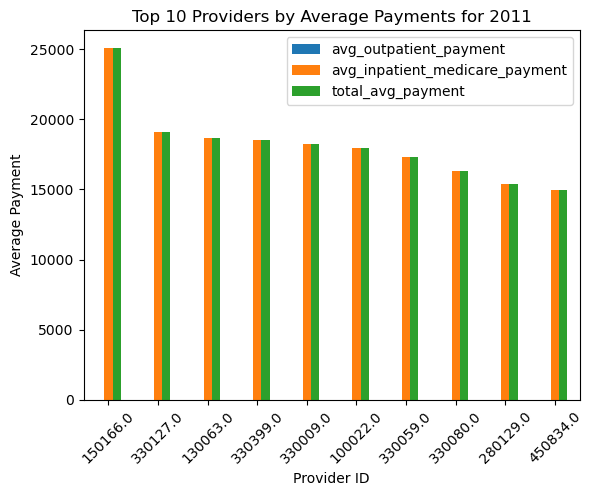

In [259]:
# Let's start with 2011
# Calculate average outpatient payments per provider
outpatient_avg_payments = outpatient_2011.groupby('provider_id')['average_total_payments'].mean()

# Calculate average inpatient Medicare payments per provider
inpatient_avg_medicare_payments = inpatient_2011.groupby('provider_id')['average_medicare_payments'].mean()

# Combine and rank the results
combined_payments = pd.concat([outpatient_avg_payments, inpatient_avg_medicare_payments], axis=1)
combined_payments.columns = ['avg_outpatient_payment', 'avg_inpatient_medicare_payment']
combined_payments['total_avg_payment'] = combined_payments.sum(axis=1)
combined_payments.sort_values(by='total_avg_payment', ascending=False, inplace=True)

# Visualize the top 10 providers
combined_payments.head(10).plot(kind='bar')
plt.title('Top 10 Providers by Average Payments for 2011')
plt.xlabel('Provider ID')
plt.ylabel('Average Payment')
plt.xticks(rotation=45)
plt.show()

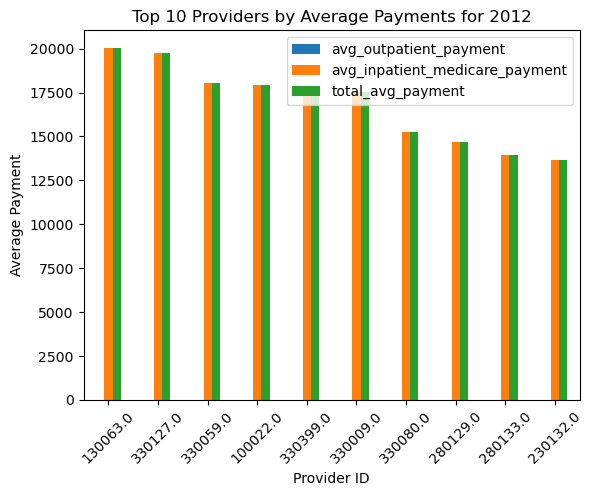

In [263]:
# Let's start with 2012
# Calculate average outpatient payments per provider
outpatient_avg_payments = outpatient_2012.groupby('provider_id')['average_total_payments'].mean()

# Calculate average inpatient Medicare payments per provider
inpatient_avg_medicare_payments = inpatient_2012.groupby('provider_id')['average_medicare_payments'].mean()

# Combine and rank the results
combined_payments = pd.concat([outpatient_avg_payments, inpatient_avg_medicare_payments], axis=1)
combined_payments.columns = ['avg_outpatient_payment', 'avg_inpatient_medicare_payment']
combined_payments['total_avg_payment'] = combined_payments.sum(axis=1)
combined_payments.sort_values(by='total_avg_payment', ascending=False, inplace=True)

# Visualize the top 10 providers
combined_payments.head(10).plot(kind='bar')
plt.title('Top 10 Providers by Average Payments for 2012')
plt.xlabel('Provider ID')
plt.ylabel('Average Payment')
plt.xticks(rotation=45)
plt.show()

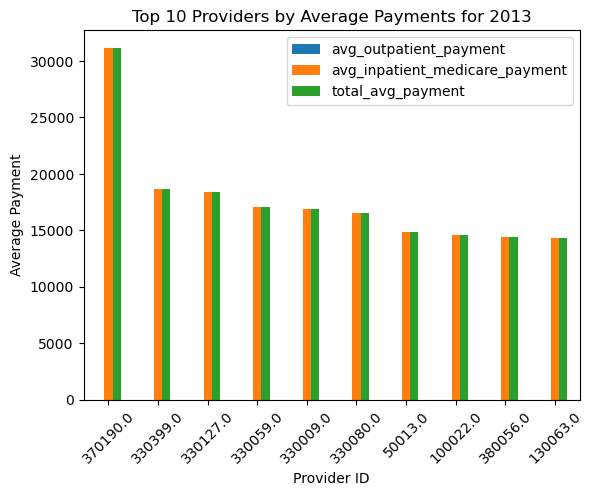

In [265]:
# Let's start with 2013
# Calculate average outpatient payments per provider
outpatient_avg_payments = outpatient_2013.groupby('provider_id')['average_total_payments'].mean()

# Calculate average inpatient Medicare payments per provider
inpatient_avg_medicare_payments = inpatient_2013.groupby('provider_id')['average_medicare_payments'].mean()

# Combine and rank the results
combined_payments = pd.concat([outpatient_avg_payments, inpatient_avg_medicare_payments], axis=1)
combined_payments.columns = ['avg_outpatient_payment', 'avg_inpatient_medicare_payment']
combined_payments['total_avg_payment'] = combined_payments.sum(axis=1)
combined_payments.sort_values(by='total_avg_payment', ascending=False, inplace=True)

# Visualize the top 10 providers
combined_payments.head(10).plot(kind='bar')
plt.title('Top 10 Providers by Average Payments for 2013')
plt.xlabel('Provider ID')
plt.ylabel('Average Payment')
plt.xticks(rotation=45)
plt.show()